<a href="https://colab.research.google.com/github/ShishkinaMarina/LAB/blob/main/HW3_shishkina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя:*Марина
*Фамилия:*Шишкина
*Электронная почта:*



In [39]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

In [40]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length=len(uploaded[fn])))

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv
User uploaded file "ad_viz_plotval_data.csv" with length 1330103 bytes


In [42]:
df=pd.read_csv('ad_viz_plotval_data.csv')
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            6514 non-null   object 
 1   Source                          6514 non-null   object 
 2   Site ID                         6514 non-null   int64  
 3   POC                             6514 non-null   int64  
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64
 5   UNITS                           6514 non-null   object 
 6   DAILY_AQI_VALUE                 6514 non-null   int64  
 7   Site Name                       6514 non-null   object 
 8   DAILY_OBS_COUNT                 6514 non-null   int64  
 9   PERCENT_COMPLETE                6514 non-null   float64
 10  AQS_PARAMETER_CODE              6514 non-null   int64  
 11  AQS_PARAMETER_DESC              6514 non-null   object 
 12  CBSA_CODE                       65

In [44]:
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


In [45]:
#меняю формат даты
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
#проверяю наличие нулевых значений
df.isnull().values.any()

False

In [47]:
#вычисляю медиану и стандартное отклонение для столбца Daily Mean PM2.5 Concentration
med_PM2_5 = df['Daily Mean PM2.5 Concentration'].median()
std_PM2_5 = df['Daily Mean PM2.5 Concentration'].std()

print(med_PM2_5)
print(std_PM2_5)

5.7
6.279512287452537


Медиана 5,7 указывает, что половина зарегистрированных значений среднесуточной концентрации PM2.5 была ниже 5,7 мкг/м³, а другая половина - выше
Разброс данных в контексте стандартного отклонения довольно велик, что может указывать на значительные колебания уровня PM2.5 в разные дни.


In [48]:
#вычисляю медиану и стандартное отклонение для столбца DAILY_AQI_VALUE
med_AQI = df['DAILY_AQI_VALUE'].median()
std_AQI = df['DAILY_AQI_VALUE'].std()

print(med_AQI)
print(std_AQI)

24.0
19.29858902513184


Медиана указывает на то, что в половине случаев значение индекса качества воздуха (AQI) было ниже 24, а в половине случаев – выше. Удовлетворительное качество воздуха: AQI 24 попадает в диапазон "хорошего" качества воздуха (0-50), что обычно означает минимальный риск для здоровья.
Стандартное отклонение 19,3 указывает на достаточно большой разброс значений AQI вокруг медианы.  Это означает, что в некоторые дни качество воздуха могло быть заметно лучше или хуже, чем типичное значение 24.


### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


**задача 1**

In [49]:
#группирую данные по дате и вычисляю среднее значение PM2.5 и AQI
daily_avg1 = df.groupby('Date')[['Daily Mean PM2.5 Concentration']].mean().round(4)
daily_avg1.head()

,Daily Mean PM2.5 Concentration
Date,
2023-01-01,3.4944
2023-01-02,2.6389
2023-01-03,9.6611
2023-01-04,7.2778
2023-01-05,2.5389


In [51]:
daily_avg2 = df.groupby('Date')[['DAILY_AQI_VALUE']].mean().round(4)
daily_avg2.head()

,DAILY_AQI_VALUE
Date,
2023-01-01,14.6111
2023-01-02,11.0000
2023-01-03,40.1111
2023-01-04,30.2778
2023-01-05,10.5556


(19339.8, 19740.2)

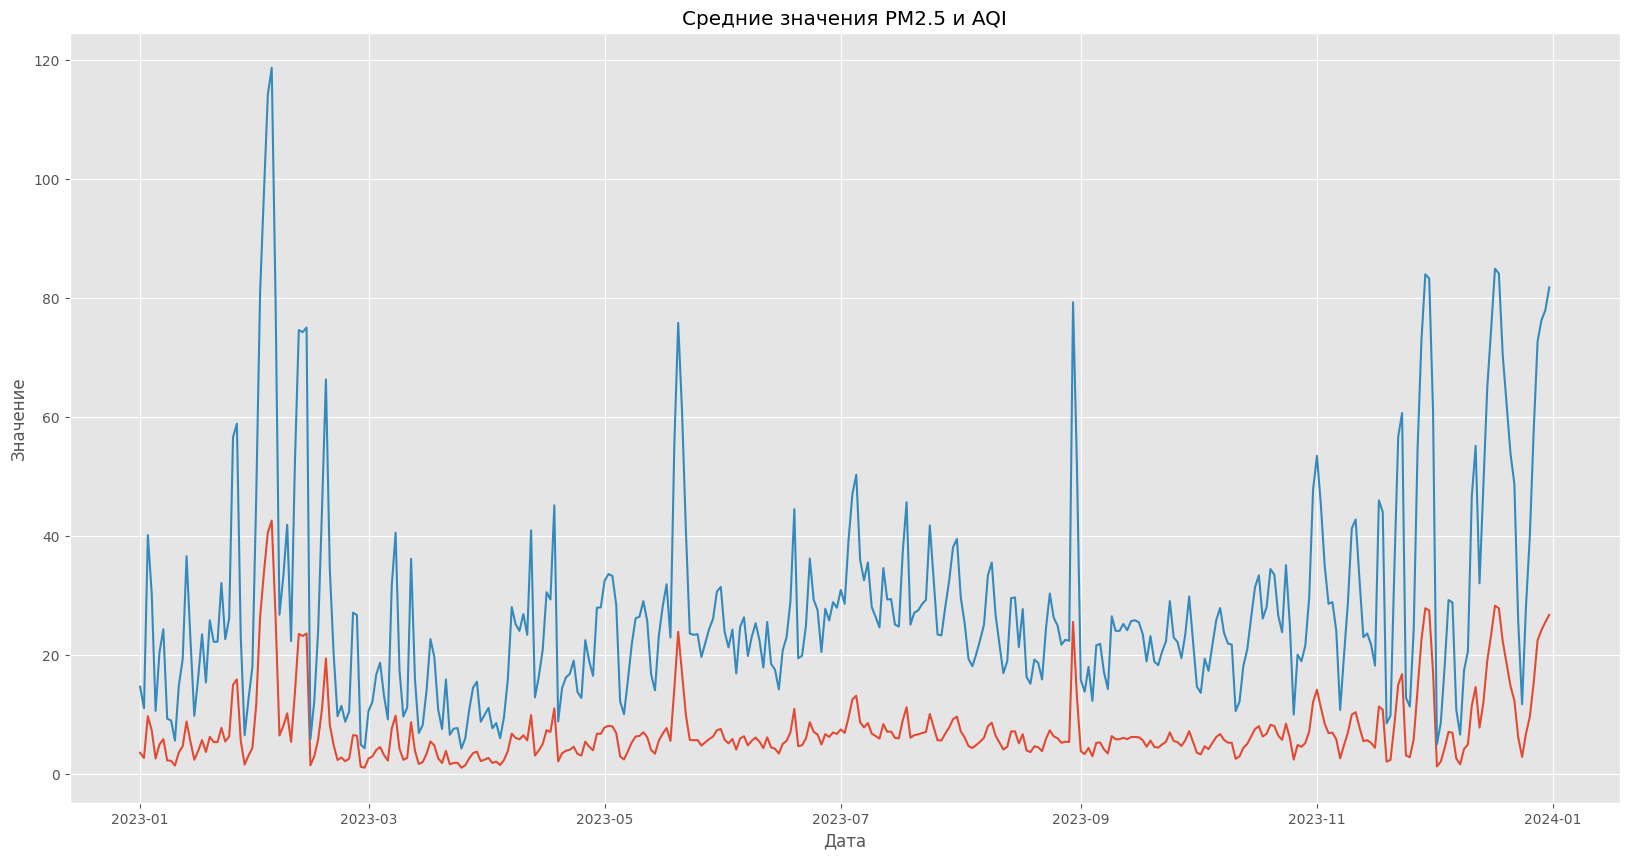

In [72]:
plt.figure(figsize=(20, 10))
plt.plot(daily_avg1, label='Среднее по PM2.5')
plt.plot(daily_avg2, label='Среднее по AQI')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title("Средние значения PM2.5 и AQI")
plt.grid(True)
plt.xlim()

**задача 2**
Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Результаты для обоих участков должны быть на одном рисунке.

Подсказка: использовать функцию pandas groupby

In [64]:
id_005 = df[df['Site ID'] == 490352005]
id_015 = df[df['Site ID'] == 490353015]

id_005.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,2023-01-01,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,2023-01-02,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,2023-01-03,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,2023-01-04,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,2023-01-05,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


In [66]:
id_005 = id_005.groupby(['Site ID', 'Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
id_005.head()

,Site ID,Date,POC,Daily Mean PM2.5 Concentration
0,490352005,2023-01-01,1,4.6
1,490352005,2023-01-01,4,5.3
2,490352005,2023-01-02,1,4.0
3,490352005,2023-01-02,4,4.1
4,490352005,2023-01-03,1,12.5


In [67]:
id_015 = id_015.groupby(['Site ID', 'Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
id_015.head()

,Site ID,Date,POC,Daily Mean PM2.5 Concentration
0,490353015,2023-01-01,1,3.5
1,490353015,2023-01-01,3,2.8
2,490353015,2023-01-02,1,2.2
3,490353015,2023-01-02,3,1.3
4,490353015,2023-01-03,1,11.0


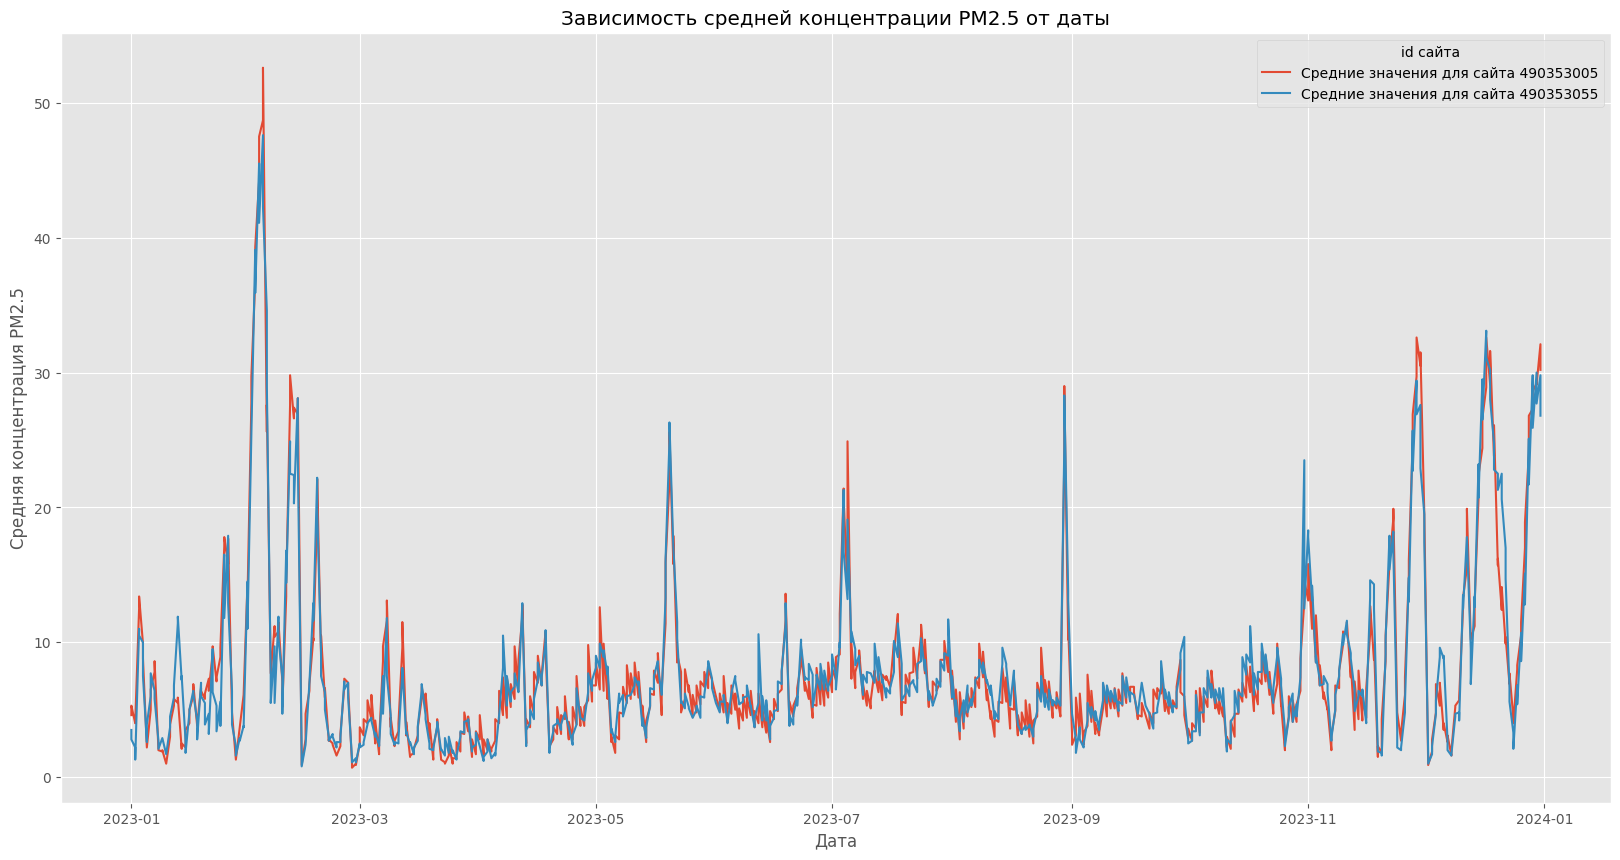

In [71]:
plt.figure(figsize=(20, 10))
plt.plot(id_005['Date'], id_005['Daily Mean PM2.5 Concentration'], label='Средние значения для сайта 490353005')
plt.plot(id_015['Date'], id_015['Daily Mean PM2.5 Concentration'], label='Средние значения для сайта 490353055')
plt.xlabel('Дата')
plt.ylabel('Средняя концентрация PM2.5')
plt.title('Зависимость средней концентрации PM2.5 от даты')
plt.legend(title='id сайта')
plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

In [76]:
mean = df.groupby(['Date','Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()
mean.head()

,Date,Site ID,POC,DAILY_AQI_VALUE
0,2023-01-01,490352005,1,19.0
1,2023-01-01,490352005,4,22.0
2,2023-01-01,490353006,1,18.0
3,2023-01-01,490353006,2,28.0
4,2023-01-01,490353006,4,18.0


In [77]:
mean1 = mean.groupby(['Date'])['DAILY_AQI_VALUE'].mean().reset_index()
mean1.head()

,Date,DAILY_AQI_VALUE
0,2023-01-01,14.611111
1,2023-01-02,11.000000
2,2023-01-03,40.111111
3,2023-01-04,30.277778
4,2023-01-05,10.555556


In [81]:
avg = mean.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window=7).mean().reset_index()
avg

,Date,DAILY_AQI_VALUE
0,2023-01-01,NaN
1,2023-01-02,NaN
2,2023-01-03,NaN
3,2023-01-04,NaN
4,2023-01-05,NaN
...,...,...
360,2023-12-27,37.928571
361,2023-12-28,40.619048
362,2023-12-29,44.547619
363,2023-12-30,52.031746


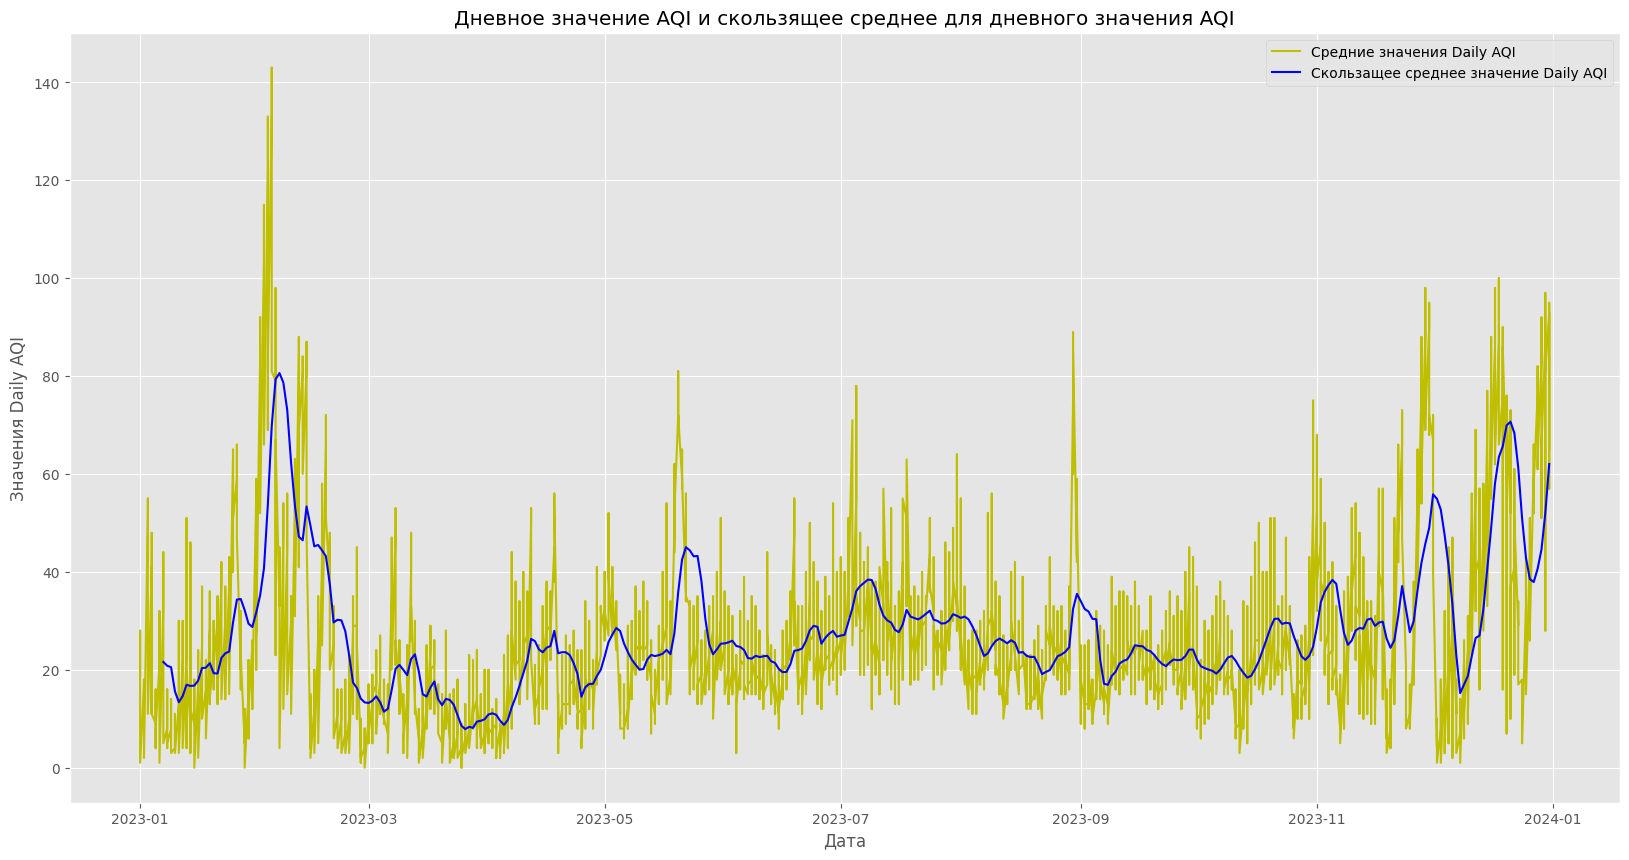

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(mean['Date'], mean['DAILY_AQI_VALUE'], label='Средние значения Daily AQI',color='y')
plt.plot(avg['Date'], avg['DAILY_AQI_VALUE'], label='Скользащее среднее значение Daily AQI', color='blue')
plt.xlabel('Дата')
plt.ylabel('Значения Daily AQI')
plt.title('Дневное значение AQI и скользящее среднее для дневного значения AQI')
plt.legend()
plt.show()


## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:**

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [35]:
import numpy as np
import math
import statsmodels.stats.proportion as s
import scipy.stats

In [36]:
Na=3000
Nb=3000
na=800
nb=1000
pa=na/Na
pb=nb/Nb

print(f"Доля кликов по логотипу А: {pa}")
print(f"Доля кликов по логотипу В: {pb}")

#расчёт общей пропорции кликов:
p=(Na/(Na+Nb))*pa+(Nb/(Na+Nb))*pb
q=1-p
print("p=",p)
print("q=",q)

z=(pa-pb)/math.sqrt(p*q*((1/Na)+(1/Nb)))
print("z-значение =", z)

Доля кликов по логотипу А: 0.26666666666666666
Доля кликов по логотипу В: 0.3333333333333333
p= 0.3
q= 0.7
z-значение = -5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [30]:
cdf_value = 1 - scipy.stats.norm.cdf(z)
cdf_value

0.9999999912146049

In [21]:
#Вычисляем p-значение с помощью proportions_ztest
count = np.array([na, nb])
nobs = np.array([Na, Nb])
stat, p_value_ztest = proportions_ztest(count, nobs, alternative='smaller')

# Выводим результаты
print(f"P-значение (cdf): {p_value_cdf:.4f}")
print(f"P-значение (proportions_ztest): {p_value_ztest:.4f}")


P-значение (cdf): 1.0000
P-значение (proportions_ztest): 0.0000


In [34]:
count = np.array([na, nb])
nobs = np.array([Na, Nb])
z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

print(f"Z статистика: {z_stat}")
print(f"P-значение: {p_value}")

if p_value < 0.05:
    print("Отклоняем нулевую гипотезу. Логотип B статистически значимо лучше.")
else:
    print("Недостаточно доказательств, чтобы отклонить нулевую гипотезу")

Z статистика: -5.6343616981901095
P-значение: 1.7570790152024724e-08
Отклоняем нулевую гипотезу. Логотип B статистически значимо лучше.
